In [1]:
knitr::opts_chunk$set(echo = TRUE)
library(fpp)

Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


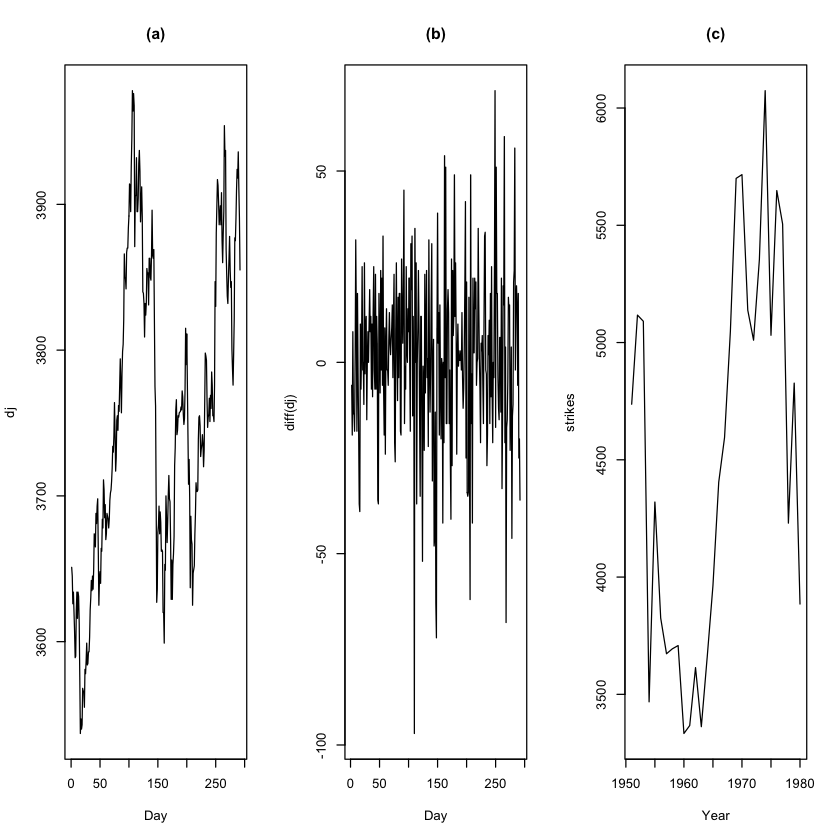

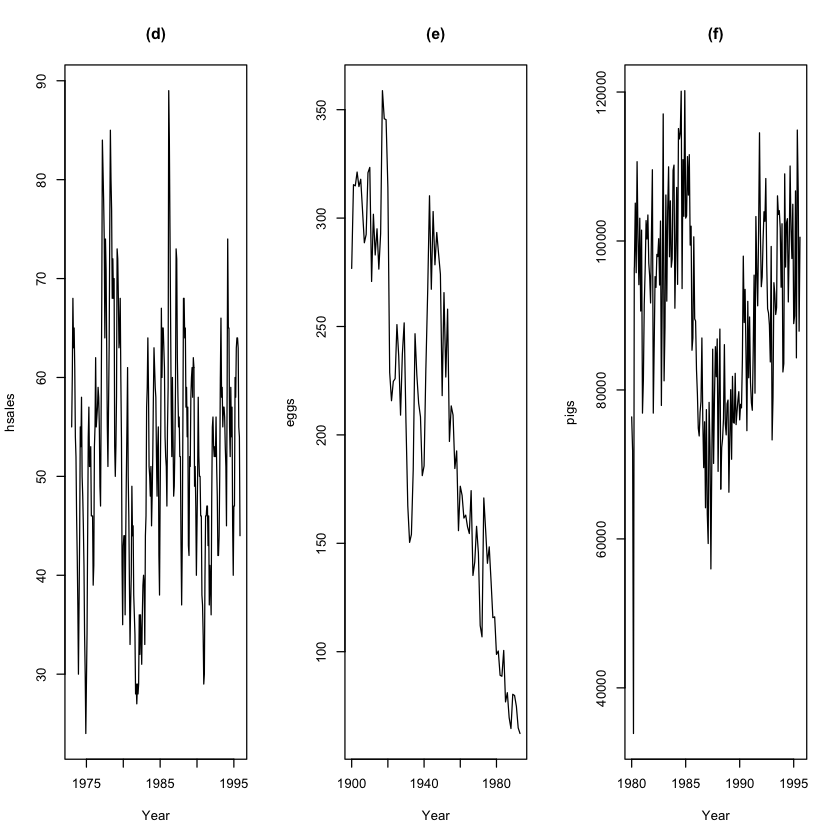

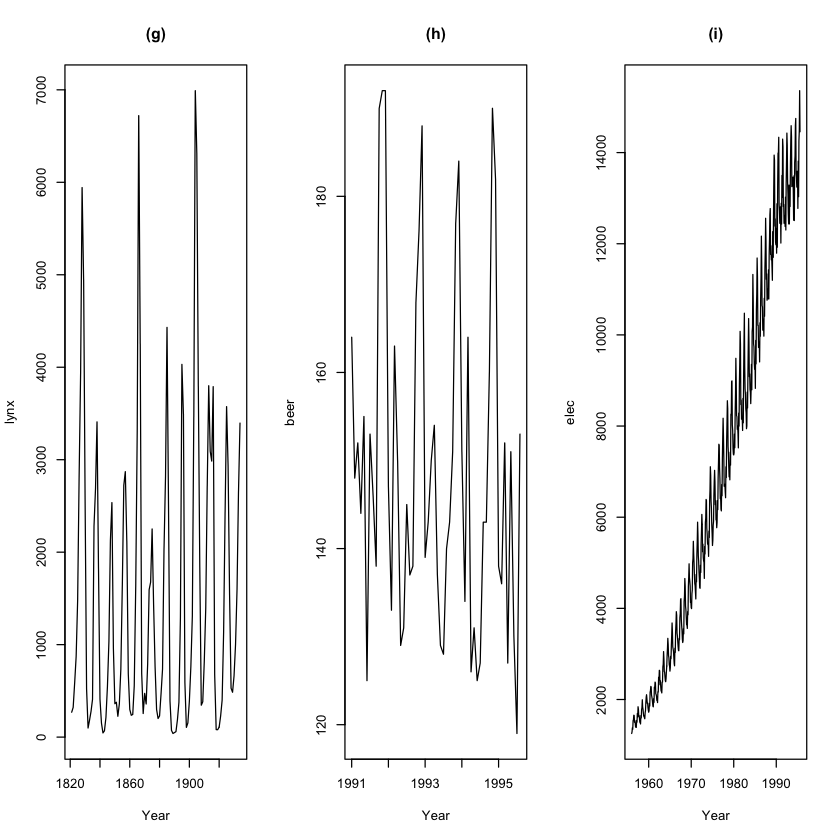


	Box-Ljung test

data:  diff(dj)
X-squared = 14.461, df = 10, p-value = 0.153


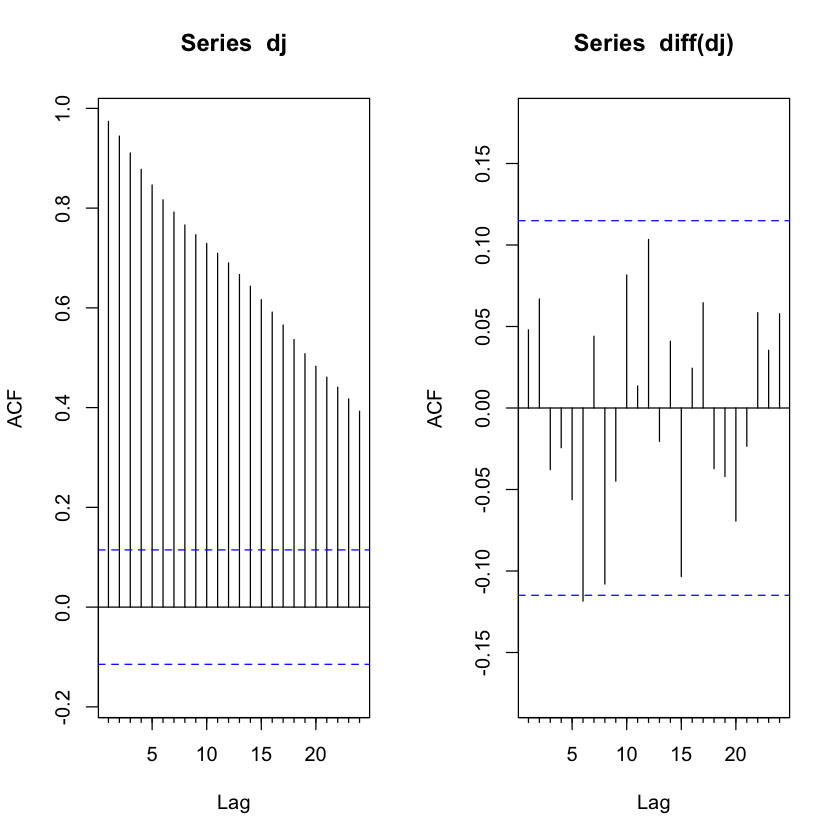

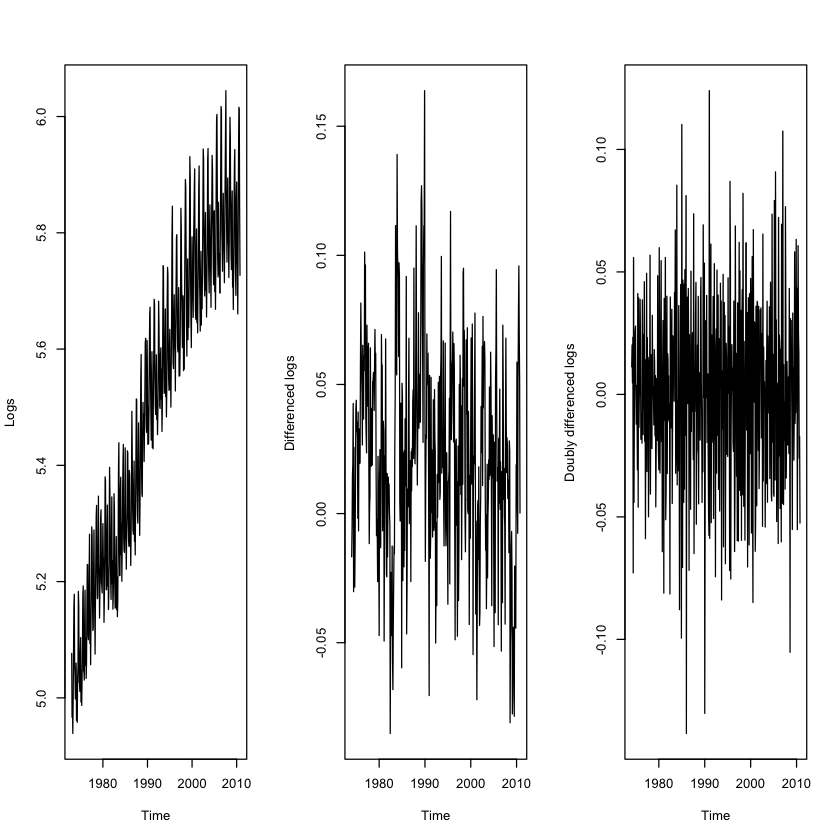

In [2]:
par(mfrow = c(1, 3))
plot(dj, main = "(a)", xlab = "Day")
plot(diff(dj), main = "(b)", xlab = "Day")
plot(strikes, main = "(c)", xlab = "Year")
plot(hsales, main = "(d)", xlab = "Year")
plot(eggs, main = "(e)", xlab = "Year")
plot(pigs, main = "(f)", xlab = "Year")
plot(lynx, main = "(g)", xlab = "Year")
plot(beer, main = "(h)", xlab = "Year")
plot(elec, main = "(i)", xlab = "Year")

par(mfrow = c(1, 2))
Acf(dj)
Acf(diff(dj))

Box.test(diff(dj), type = "L", lag = 10)

par(mfrow = c(1, 3))
plot(log(usmelec), ylab="Logs")
plot(diff(log(usmelec),12), ylab="
     Differenced logs")
plot(diff(diff(log(usmelec),12),1), ylab="Doubly differenced logs")


par(mfrow=c(1,1))



Creating AR(1) and AR(2) charts


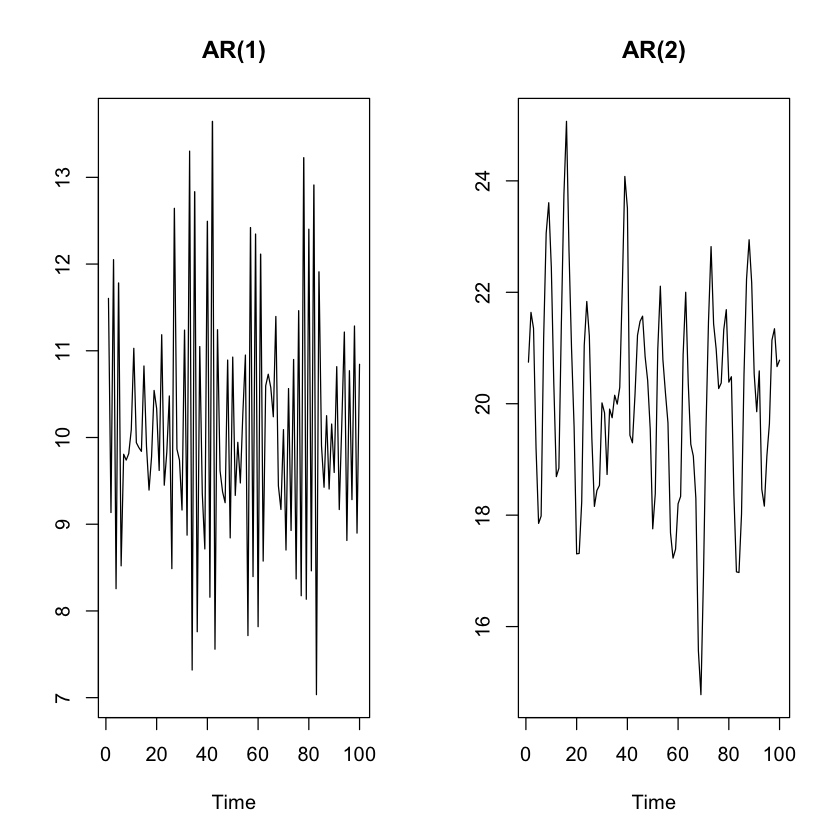

In [3]:
set.seed(1)
par(mfrow = c(1, 2))
testAR1 <- 10 + arima.sim(list(ar = -0.8), n= 100)
plot(testAR1,
     ylab = "", main = "AR(1)")
testAR2 <- 20 + arima.sim(list(ar = c(1.3, -0.7)), n = 100)
plot(testAR2,
     ylab = "", main = "AR(2)")



Creating MA(1) and MA(2) charts


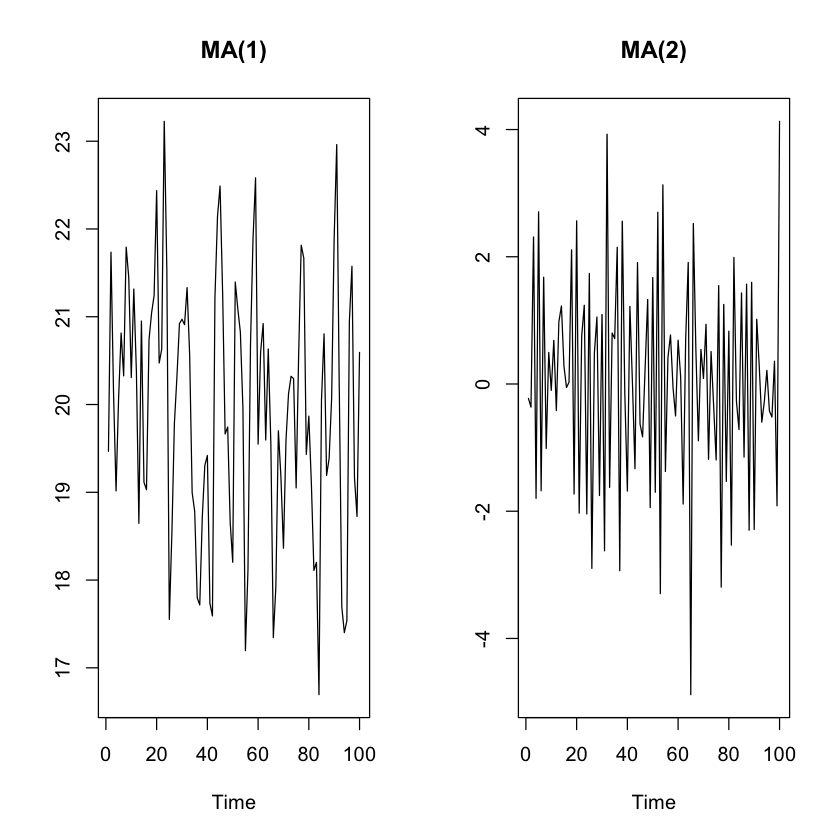

In [4]:
set.seed(2)
par(mfrow = c(1, 2))
testMA1 <- 20 + arima.sim(list(ma = 0.8), n = 100)
plot(testMA1,
     ylab = "", main = "MA(1)")
testMA2 <- arima.sim(list(ma = c(-1, +0.8)), n = 100)
plot(testMA2,
     ylab = "", main = "MA(2)")



Code for MA smoothing:


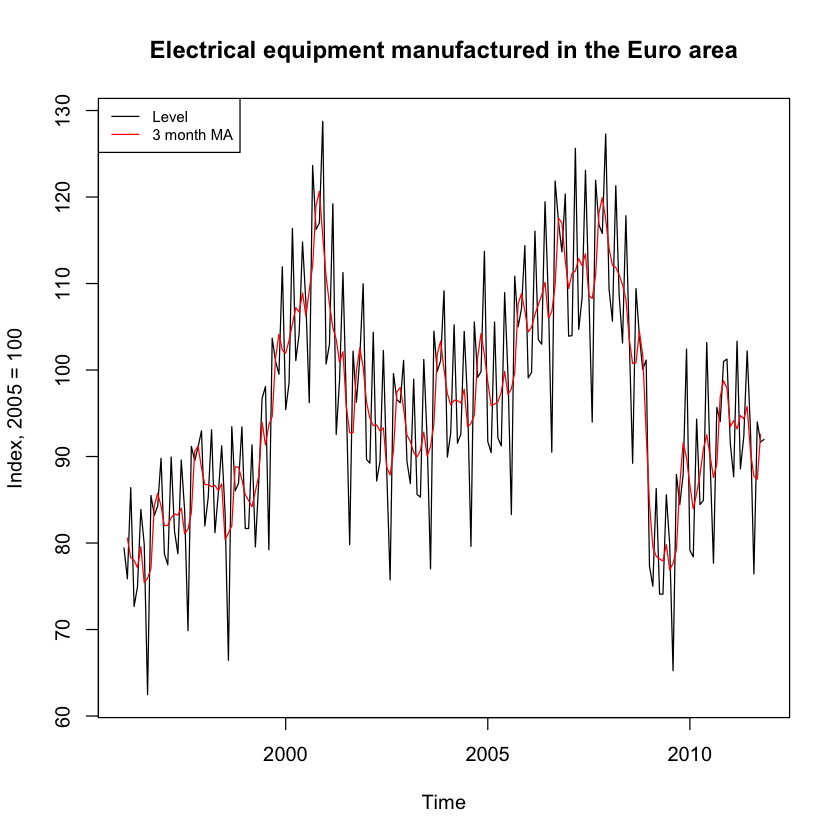

In [5]:
plot(elecequip, main = "Electrical equipment manufactured in the Euro area", ylab = "Index, 2005 = 100")
lines(ma(elecequip, order = 3), col = 'red')
legend("topleft", cex = 0.75,legend=c("Level","3 month MA"), col=c("black", "red"), lty = c(1,1))



It's the Dow Jones again!  Remember we said DJ isn't stationary so we take differences?  Here's how the ARIMA process models them:



In [6]:

djarima <- auto.arima(dj, seasonal = FALSE)
djarima
diffdjarima<- auto.arima(diff(dj), seasonal = FALSE)
diffdjarima


Series: dj 
ARIMA(0,1,0) with drift         

Coefficients:
       drift
      0.7010
s.e.  1.3188

sigma^2 estimated as 507.9:  log likelihood=-1318.9
AIC=2641.81   AICc=2641.85   BIC=2649.15

Series: diff(dj) 
ARIMA(0,0,0) with non-zero mean 

Coefficients:
      intercept
         0.7010
s.e.     1.3188

sigma^2 estimated as 507.9:  log likelihood=-1318.9
AIC=2641.81   AICc=2641.85   BIC=2649.15


What about forecasting? Does this method help with forecasting the Dow?



In [ ]:
par(mfrow = c(1, 2))

plot(forecast(djarima,h=10),include=80)
plot(rwf(dj, drift = TRUE))


plot(forecast(diffdjarima,h=10),include=80)
plot(rwf(diff(dj), drift = TRUE))


par(mfrow = c(1, 1))



How pictures can help with your auto.arima check



In [ ]:
tsdisplay(testAR2, main = "What is this?")


tsdisplay(testMA2, main = "What about this one?")


Example:

Basic EDA:



In [ ]:
plot(elecequip)
Acf(elecequip)


Hmmmm looks like seasonal adjustment might help:



In [ ]:
eeadj <- seasadj(stl(elecequip, s.window="periodic"))
plot(elecequip)
lines(eeadj, col = "blue")
tsdisplay(diff(eeadj),main="")



ACF looks like there might be 3 relevant lags.




In [ ]:
fit <- Arima(eeadj, order=c(3,0,0))
summary(fit)


Maybe we need an ARIMA model, not an ARMA model



In [ ]:
fit <- Arima(eeadj, order=c(3,1,0))
summary(fit)


AICc went down.  What about a MA term?  There's some spikes in the PACF...



In [ ]:
fit <- Arima(eeadj, order=c(3,1,3))
summary(fit)


AICc went up. Wait, the MA term depends on the spikes in the ACF.  Maybe 3 is the wrong number



In [ ]:
fit <- Arima(eeadj, order=c(3,1,1))
summary(fit)


What does the auto.arima say?



In [ ]:
fit <- auto.arima(eeadj, seasonal = FALSE)
summary(fit)


Okay, let's go with this one.  How do the residuals look?



In [ ]:
Acf(residuals(fit))


Picture looks good but what about the statistics?



In [ ]:
Box.test(residuals(fit), lag=24, fitdf=4, type="Ljung")

What's with the fitdf = 4?

When testing the residuals of an estimated ARIMA model, the degrees of freedom need to be adjusted to reflect the parameter estimation. For example, for an ARIMA(p,0,q) model, the degrees of freedom should be set to p+q.


And more pictures?



In [ ]:
plot(forecast(fit))


Airpassenger seasonal example:



In [ ]:
tsdisplay(AirPassengers)

AP <- auto.arima(AirPassengers)
AP
APS <- auto.arima(AirPassengers, seasonal = FALSE)
APS


Wow, that's weird. But the AICc says that the seasonal model fits best.  Let's check out the residuals



In [ ]:

Acf(residuals(APS))

Acf(residuals(AP))



So we forecast:



In [ ]:
Box.test(residuals(AP), lag=24, fitdf=0, type="Ljung")


This says we didn't get it quite right.  Maybe we needed to do more work first.  Seasonally difference the data?  Some other transformation?



More elaborate example from the Fpp book




In [ ]:
tsdisplay(euretail)


***



In [ ]:
tsdisplay(diff(euretail,4))


***



In [ ]:
tsdisplay(diff(diff(euretail,4)))


***



In [ ]:
fit <- Arima(euretail, order=c(0,1,1), seasonal=c(0,1,1))
tsdisplay(residuals(fit))


***



In [ ]:
fit3 <- Arima(euretail, order=c(0,1,3), seasonal=c(0,1,1))
res <- residuals(fit3)
tsdisplay(res)


***



In [ ]:
Box.test(res, lag=16, fitdf=4, type="Ljung")


***



In [ ]:
auto.arima(euretail)


***



In [ ]:
auto.arima(euretail, stepwise=FALSE, approximation=FALSE)


***



In [ ]:
plot(forecast(fit3, h=12))